In [115]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [116]:
import outliers as out


In [117]:
df=pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
#Outliers_to_drop = out.detect_outliers(df,2,["Age","SibSp","Parch","Fare"])
#Outliers_to_drop.head()

In [119]:
X=df
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
import seaborn as sns
sns.set_style("whitegrid")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [121]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


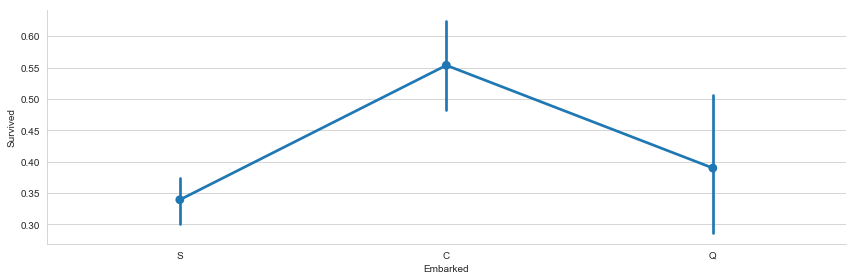

In [122]:
X.Embarked=X.Embarked.fillna('S')
sns.factorplot("Embarked","Survived",data=X,height=4,aspect=3)
#sns.factorplot("Embarked",kind="count",data=X,height=4,aspect=3)

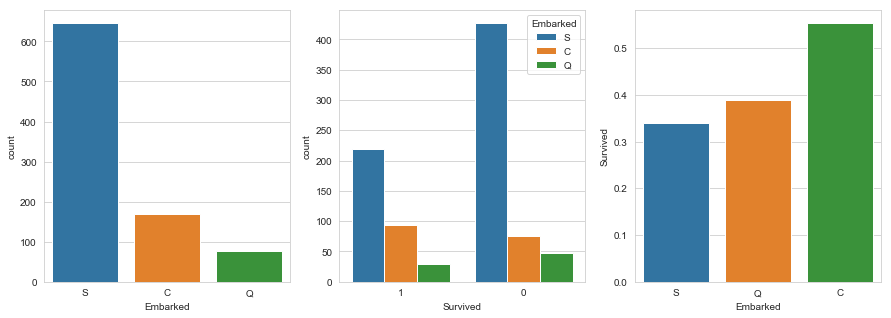

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
sns.countplot("Embarked",data=X,ax=axis1)
#sns.countplot("Embarked",hue="Survived",data=X,ax=axis2)
sns.countplot("Survived",hue="Embarked",data=X,ax=axis2,order=[1,0])
X_embark=X[['Embarked','Survived']].groupby(["Embarked"],as_index=False).mean()
sns.barplot("Embarked","Survived",data=X_embark,ax=axis3,order=["S","Q","C"])
#sns.factorplot("Embarked","Survived",kind="bar",data=X_embark,ax=axis3)

In [124]:
from pandas import Series,DataFrame
X_Embarked=pd.get_dummies(X.Embarked)
# print(X_Embarked.head())

X=X.join(X_Embarked)
# X=pd.concat([X,X_Embarked])
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [125]:
X.drop("Embarked",axis=1,inplace=True)


## Age

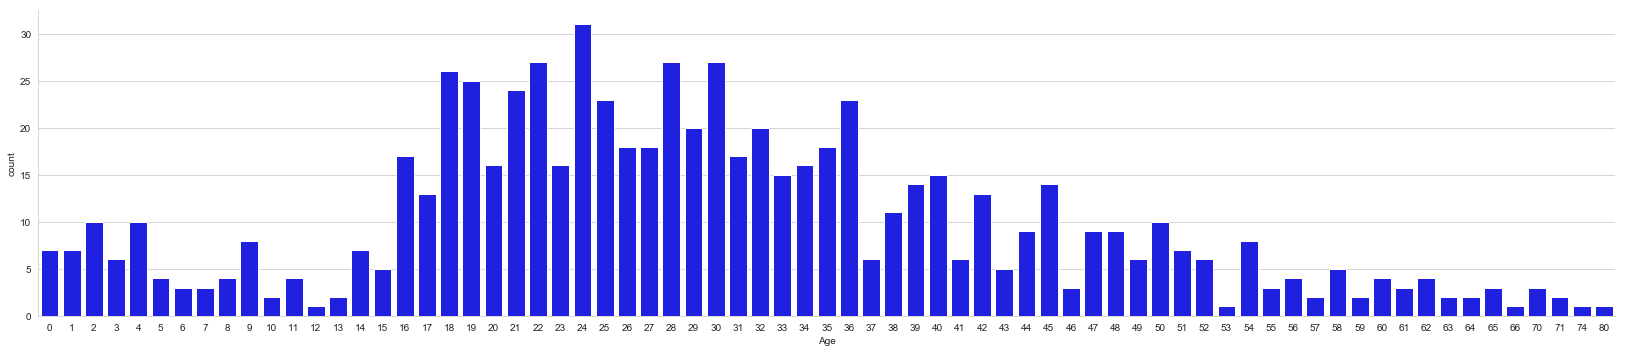

In [126]:
sns.factorplot("Age",kind='count',data=X[["Age"]].dropna().astype(int),aspect=4.5,color="b")


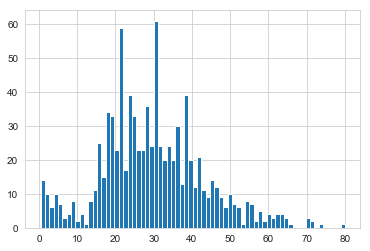

In [127]:
mean=X[["Age"]].mean()
st=X[["Age"]].std()
count=X[["Age"]].isnull().sum()
rand1=np.random.randint(mean-st,mean+st,size=count)
X['Age'][np.isnan(X['Age'])]=rand1
#X["Age"][(X.Age.isnull())]=rand1
#sns.factorplot("Age",kind='count',data=X[["Age"]].astype(int),aspect=4,color="orange")
X['Age'].hist(bins=70)


## Family

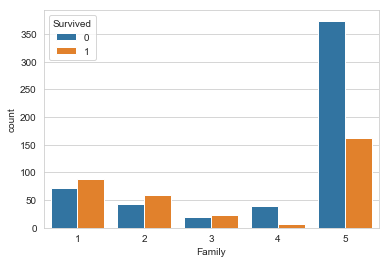

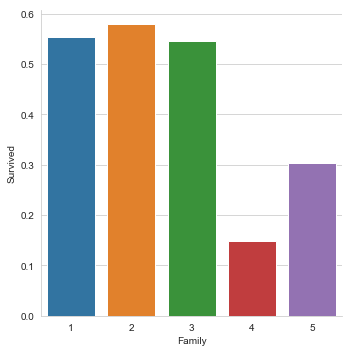

In [129]:
X.Parch.fillna(0)
X.SibSp.fillna(0)
X["Family"]=X["Parch"]+X["SibSp"]
X['Family'][(X['Family']==1)]=1
X['Family'][(X['Family']==2)]=2
X['Family'][(X['Family']==3) | (X['Family']==4)]=3
X['Family'][(X['Family']>4)]=4
X['Family'][X['Family']==0]=5

X.drop(['Parch','SibSp'],axis=1,inplace=True)
X_family=X[['Family','Survived']].groupby('Family',as_index=False).mean()
#fig,(axis1,axis2)=plt.subplots(1,2,figsize(20,10))
sns.countplot("Family",data=X,hue="Survived",order=[1,2,3,4,5])
sns.factorplot("Family","Survived",kind='bar',data=X_family,order=[1,2,3,4,5])


In [130]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,C,Q,S,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,0,1,5


## Fare

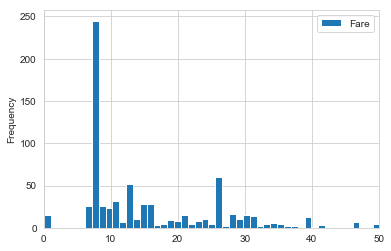

In [131]:
X[['Fare']].fillna(X.Fare.median(),inplace=True)
X[["Fare"]].plot(kind="hist",bins=500,xlim=(0,50))

#X.Fare.hist(bins=50)

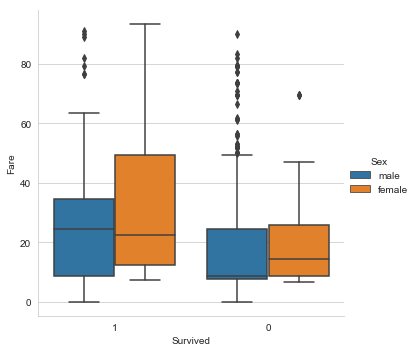

In [132]:
X_f=X[["Fare","Survived",'Sex']][X["Fare"]<100]
sns.factorplot("Survived","Fare",kind="box",data=X_f,order=[1,0],hue="Sex")

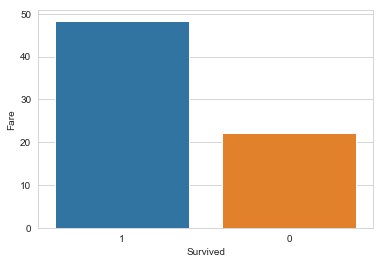

In [133]:
xt=X[["Survived","Fare"]].groupby("Survived",as_index=False).mean()
sns.barplot("Survived","Fare",data=xt,order=[1,0])
#sns.factorplot("Survived","Fare",data=xt,kind='bar',order=[1,0])


In [134]:
def fun(passenger):
    Sex,Age=passenger
    return "child" if Age<=16 else Sex
X["Person"]=X[["Sex","Age"]].apply(fun,axis=1)
X["Person"].head(1)
X.drop(["Sex","Age","Cabin"],axis=1,inplace=True)
X.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,C,Q,S,Family,Person
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,0,0,1,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1,0,0,1,female
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,0,0,1,5,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,0,0,1,1,female
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,0,0,1,5,male


In [135]:
X_person=pd.get_dummies(X[["Person"]])
X=X.join(X_person)
X.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,C,Q,S,Family,Person,Person_child,Person_female,Person_male
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,0,0,1,1,male,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1,0,0,1,female,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,0,0,1,5,female,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,0,0,1,1,female,0,1,0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,0,0,1,5,male,0,0,1


In [136]:
X.drop(["Person","Person_male"],axis=1,inplace=True)
X.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,C,Q,S,Family,Person_child,Person_female
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,0,0,1,5,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,0,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,0,0,1,5,0,0


## Pclass

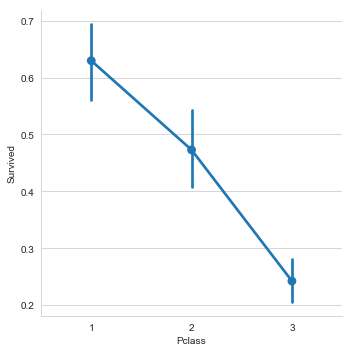

In [137]:
sns.factorplot("Pclass","Survived",data=X,order=[1,2,3],aspect=1)

In [138]:
P_class=pd.get_dummies(X.Pclass)
P_class.columns=['Class_1','Class_2','Class_3']
X=X.join(P_class)
X.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,C,Q,S,Family,Person_child,Person_female,Class_1,Class_2,Class_3
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,0,0,1,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1,0,0,1,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,0,0,1,5,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,0,0,1,1,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,0,0,1,5,0,0,0,0,1


In [139]:
X.drop(["Pclass"],axis=1,inplace=True)
Y=X.Survived
X.drop(["Survived","Name","Ticket","PassengerId"],axis=1,inplace=True)

In [140]:
X.head()

,Fare,C,Q,S,Family,Person_child,Person_female,Class_1,Class_2,Class_3
0,7.2500,0,0,1,1,0,0,0,0,1
1,71.2833,1,0,0,1,0,1,1,0,0
2,7.9250,0,0,1,5,0,1,0,0,1
3,53.1000,0,0,1,1,0,1,1,0,0
4,8.0500,0,0,1,5,0,0,0,0,1


In [141]:
X['Fare']=X["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
X.head()

,Fare,C,Q,S,Family,Person_child,Person_female,Class_1,Class_2,Class_3
0,1.981001,0,0,1,1,0,0,0,0,1
1,4.266662,1,0,0,1,0,1,1,0,0
2,2.070022,0,0,1,5,0,1,0,0,1
3,3.972177,0,0,1,1,0,1,1,0,0
4,2.085672,0,0,1,5,0,0,0,0,1


In [142]:
""" 
X['Fare'][X['Fare']<30]=int(1)
X['Fare'][(X['Fare']>=30) & (X['Fare']<60)]=int(2)
X['Fare'][X['Fare']>=60]=int(3)
X.head()
Xf=pd.get_dummies(X['Fare'])
Xf.columns=['f1','f2','f3']

X=X.join(Xf)
X.drop(["Fare"],axis=1,inplace=True)
X.head()
"""

' \nX[\'Fare\'][X[\'Fare\']<30]=int(1)\nX[\'Fare\'][(X[\'Fare\']>=30) & (X[\'Fare\']<60)]=int(2)\nX[\'Fare\'][X[\'Fare\']>=60]=int(3)\nX.head()\nXf=pd.get_dummies(X[\'Fare\'])\nXf.columns=[\'f1\',\'f2\',\'f3\']\n\nX=X.join(Xf)\nX.drop(["Fare"],axis=1,inplace=True)\nX.head()\n'

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
rml=RandomForestClassifier(n_estimators=20)
lml=LogisticRegression()
sm=SVC()
kf=StratifiedKFold(n_splits=50)

from sklearn.model_selection import cross_val_score as cvs


In [144]:
rr=float(0)
for i in range(0,10):
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.05)
 rml.fit(X_train,Y_train)
 rr=rr+rml.score(X_test,Y_test)
print(rr/10)

0.8266666666666665


In [145]:
scores=cvs(rml,X,Y,cv=10)
print("rml= "+str(scores.mean()))
scores=cvs(sm,X,Y,cv=10)
print("sm= "+str(scores.mean()))
scores=cvs(lml,X,Y,cv=10)
print("lml= "+str(scores.mean()))

rml= 0.799145670184996
sm= 0.8103200544773579
lml= 0.7980226421518556


In [146]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=15, n_estimators=1000, learning_rate=0.005)
rr=float(0)
for i in range(0,10):
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.05)
 model.fit(X_train,Y_train)
 rr=rr+model.score(X_test,Y_test)
print(rr/10)
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]


0.8044444444444444
